In [1]:
import torch 
import matplotlib.pyplot as plt
from tqdm import tqdm
import random

In [2]:
def data_generation(true_w, true_b, n):
    x = torch.normal(0, 1, (n, len(true_w)))
    y = torch.matmul(x, true_w) + true_b
    y += torch.normal(0, 0.01, y.shape)
    return x, y.reshape(-1,1)

In [3]:
true_w = torch.tensor([4.2, -3.0])
true_b = torch.tensor([2.0])
n = 1000

In [4]:
train_data, labels = data_generation(true_w, true_b, 1000)

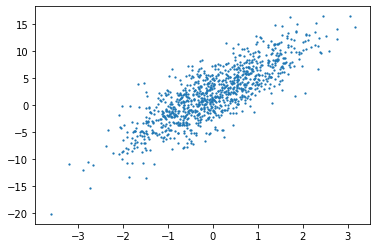

In [5]:
plt.scatter(train_data[:,0].detach().numpy(), labels.detach().numpy(), 1.5)
plt.show()

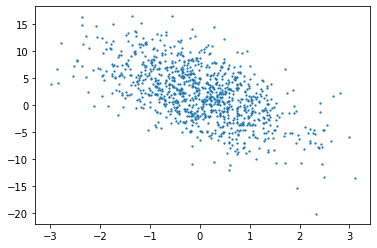

In [6]:
plt.scatter(train_data[:,1].detach().numpy(), labels.detach().numpy(), 1.5)
plt.show()

In [7]:
def data_iter(train_data, labels, batch_size):
    nums = len(train_data)
    indices = list(range(nums))
    random.shuffle(indices)
    for i in range(0, nums, batch_size):
        batch_indices = torch.tensor([indices[i:min(i+batch_size, nums)]])
        yield train_data[batch_indices], labels[batch_indices]

In [8]:
a, b = next(data_iter(train_data, labels, 10))
a,b

(tensor([[[ 1.8456, -0.0189],
          [-1.9077, -0.3512],
          [ 0.0995,  0.2256],
          [-0.4808,  2.2182],
          [-1.8648,  2.4822],
          [ 0.7924, -0.5771],
          [-0.1203,  0.5899],
          [ 2.1192, -0.3748],
          [-1.5236,  0.6424],
          [-0.5560, -2.5242]]]),
 tensor([[[  9.8045],
          [ -4.9495],
          [  1.7326],
          [ -6.6898],
          [-13.2729],
          [  7.0611],
          [ -0.2805],
          [ 12.0101],
          [ -6.3389],
          [  7.2537]]]))

In [9]:
w = torch.normal(0, 0.01, (2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [10]:
def square_loss(y_hat, y):
    return ((y_hat-y.reshape(y_hat.shape)) ** 2 / 2).sum()

In [11]:
def regression(w, b, x):
    return torch.matmul(x, w) + b

In [12]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [15]:
epochs = 20
batch_size = 10
lr = 0.03
net = regression
loss = square_loss

In [16]:
for epoch in range(epochs):
    for x, y in tqdm(data_iter(train_data, labels, batch_size)):
        y_hat = net(w, b, x)
        l = loss(y_hat, y)
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_loss = loss(net(w, b, train_data), labels)
        print(f'epoch: {epoch+1}, train loss: {train_loss.mean():f}')

100it [00:00, 3038.56it/s]


epoch: 1, train loss: 0.051296


100it [00:00, 3133.26it/s]


epoch: 2, train loss: 0.051280


100it [00:00, 2946.53it/s]


epoch: 3, train loss: 0.051281


100it [00:00, 3576.93it/s]


epoch: 4, train loss: 0.051409


100it [00:00, 3495.75it/s]


epoch: 5, train loss: 0.051375


100it [00:00, 3027.33it/s]


epoch: 6, train loss: 0.051606


100it [00:00, 3181.75it/s]


epoch: 7, train loss: 0.051352


100it [00:00, 3256.95it/s]


epoch: 8, train loss: 0.051392


100it [00:00, 3896.35it/s]


epoch: 9, train loss: 0.051623


100it [00:00, 3342.00it/s]


epoch: 10, train loss: 0.051456


100it [00:00, 3713.68it/s]


epoch: 11, train loss: 0.051265


100it [00:00, 3581.08it/s]


epoch: 12, train loss: 0.051342


100it [00:00, 3342.50it/s]


epoch: 13, train loss: 0.051316


100it [00:00, 3713.55it/s]


epoch: 14, train loss: 0.051295


100it [00:00, 3851.41it/s]


epoch: 15, train loss: 0.051406


100it [00:00, 3577.90it/s]


epoch: 16, train loss: 0.051670


100it [00:00, 3709.28it/s]


epoch: 17, train loss: 0.051322


100it [00:00, 3713.48it/s]


epoch: 18, train loss: 0.051382


100it [00:00, 3577.87it/s]


epoch: 19, train loss: 0.051282


100it [00:00, 3709.25it/s]

epoch: 20, train loss: 0.051693
